# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 4: Predicting College Admissions

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [5]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css"
).text
HTML(styles)

In [83]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT**. 

- To submit your assignment follow the instructions given in Canvas.

- This assignment **must be done individually**.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).
<hr style="height:2pt">

## Overview and Data Description

### Predicting admissions into elite universities

In this problem set we will model the chances of high school students being accepted into two different elite undergraduate colleges (one is elite at least :) ): Harvard and Yale.  The data are provided in the file `data/college_admissions.csv` and were scraped from [collegedata.com](https://www.collegedata.com/) (where applicants volunteer to share their information).  Each observation corresponds to an applicant to one of the two different colleges (note: the same applicant may show up in two rows: once for each college).  The main response is the `admitted` variable (1 = admitted, 0 = denied), and there are are several predictors to consider:

- **id**: a unique identifier for the applicant 
- **test**: a standardized measurement of the applicants highest ACT or SAT combined score (2400 is the maximum). 
- **ap**: the number of AP tests taken
- **avg_ap**: the average score on the AP tests taken (0 if no tests were taken)
- **sat_subjects**: the number of SAT subject tests taken
- **gpa**: the unweighted GPA of applicant (max of 4.0)
- **female**:  a binary indicator for gender: 1 = female, 0 = otherwise 
- **minority**: a binary indicator for under-represented minority: 1 = minority, 0 = otherwise 
- **international**: a binary indicator for international status: 1 = international, 0 = US
- **sports**: a binary indicator for HS All-American: 1 = all-American athlete, 0 = otherwise
- **school**: a categorical variable for school applied to: "Harvard" or "Yale"
- **early_app**: a binary indicator for application type: 1 = early action, 0 = regular
- **alumni**:  a binary indicator for parents' alumni status of school: 1 = a parent is an alumnus, 0 = otherwise
- **program**: the program applied to by the student with many choices (we will not use this as a predictor)
- **add_info**: additional (optional) info provided by applicant (we will not use this as a predictor)

The main set of 12 predictors is (note: you may need to modify this list when fitting different models, and your will be replacing the `school` variable with a binary `harvard` variable early in the questions below):

```python
[
    'test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','school','early_app','alumni'
]
```

Please use this dataset to answer the following questions below.

**Important notes:**

- **Unless stated otherwise, all logistic regression models should be unregularized (use `penalty="none"`) and include the intercept (which is the default in `sklearn`).**


- **When printing your output (e.g. coefficients, accuracy scores, etc.), DO NOT just print numbers without context. Please be certain provide clarifying labels for all printed numbers and limit the number of digits showing after decimals to a reasonable length (e.g. 4 decimal points for coefficients and accuracy scores).**


- **Also be sure to practice good data science principles: always use train to do analysis and never touch the test set until the very end.**

---

<div class='exercise'><b> Question 1 [16 pts]: Data Exploration using train and basic models </b></div>

The first step is to split the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. 

**IMPORTANT:** While a valid argument could be made to scale our predictors here, please **DO NOT** do so **UNTIL** it is requested of you in **question 4.1**.

**1.1** What proportion of observations were admitted overall?  What would be the classification accuracy for a baseline "naive" model where we classified ALL applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)?


**1.2** Create a binary ('dummy') variable named `harvard` that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore the marginal association of each of our 12 predictors with whether or not an applicant is admitted into the college they applied (`admitted`).  Create a separate **visual** for each predictor to investigage their relationship with college admissions.  **Suggestion:** place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.

**Note:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.

**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?


**1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  Interpret the coefficient estimates: which college is estimated to be easier to get into?  What are the estimated chances of getting into each school?


**1.5** Create a contingency table between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope).


**1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?


In [7]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

college = pd.read_csv('data/college_admissions.csv')
np.random.seed(121)

college_train, college_test, = train_test_split(
    college, test_size=0.2,  random_state = 121, shuffle=True, stratify = college['school']
)

print(college.shape)
print(college_train.shape, college_test.shape)

(1871, 16)
(1496, 16) (375, 16)


Not certain that I'm interpretting this correctly

<div class='exercise-r'>  
 
**1.1** What proportion of observations were admitted overall?  What would be the classification accuracy for a baseline "naive" model where we classified ALL applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)?
 
 
 </div>

In [44]:
college_train.head()

,id,admitted,test,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info
584,JTEQOV7ZCB,0,2080,5,4.400000,4,3.90,1,0,0,0,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign La...
1817,I03PV24OHY,1,2190,6,3.666667,3,3.97,1,0,0,0,Yale,0,0,legal studies,horseback riding 5 hrs week year round marchin...
1308,K42SAOUYJJ,0,2140,2,4.500000,3,3.70,0,0,0,0,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch ...
1336,LODYYSRTYZ,0,2120,6,3.333333,3,4.00,1,0,0,0,Yale,1,0,Biological Sciences,Varsity Orchestra Music Librarian 10 11 12 Vio...
3,OC717EAKXN,1,2400,5,5.000000,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN


In [710]:
# your code here
admitted = college.loc[college['admitted'] == 1]
admitted.head()
percent_admitted = 100* len(admitted)/len(college)
print("The percentage of admitted students is: %5.3f" %percent_admitted +  "%" )

The percentage of admitted students is: 26.991%


<div class='exercise-r'>  
 
**1.2** Create a binary ('dummy') variable named `harvard` that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore the marginal association of each of our 12 predictors with whether or not an applicant is admitted into the college they applied (`admitted`).  Create a separate **visual** for each predictor to investigage their relationship with college admissions.  **Suggestion:** place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.
 
 **Note:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.
 
 </div>

In [711]:
college['harvard'] = 0
college['yale'] = 0

In [712]:
for ind in college.index: 
   
    if college['school'][ind]=="Harvard":
        college['harvard'][ind] = 1
    else:
        college['harvard'][ind] = 0   
    
        if college['school'][ind]=="Yale":
            college['yale'][ind] = 1
        else:
            college['yale'][ind] = 0   

college

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,id,admitted,test,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,school,early_app,alumni,program,add_info,harvard,yale
0,W796LITIP9,1,2400,3,5.0,3,3.90,0,0,0,0,Harvard,0,1,NaN,NaN,1,0
1,WL2QRZQ8X3,1,2400,7,5.0,2,4.00,1,0,0,0,Harvard,0,1,chemistry biology,Tennis 3 years varsity Science Olympiad 3 year...,1,0
2,WE2YXF12K5,1,2400,1,5.0,1,4.00,1,0,0,0,Harvard,0,0,fjdslkfj,skljdkljkjsdkljfdlklj kljdsfd,1,0
3,OC717EAKXN,1,2400,5,5.0,5,4.00,1,0,0,0,Harvard,0,0,Mathematics,NaN,1,0
4,WQVYFGMWO5,1,2400,2,5.0,2,4.00,1,1,0,0,Harvard,0,0,Engineering,President of Junior Engineering Technical Soci...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,HLEUO8DB67,0,1780,0,0.0,3,3.56,1,0,1,0,Yale,0,0,Economics Neuroscience,Varsity Softball 12th Varsity Soccer 12th STUC...,0,1
1867,E9IJXXQY56,0,1760,1,4.0,3,3.60,0,1,0,0,Yale,0,0,Physics,swimming track helped build new hindu temple e...,0,1
1868,TYWGSZLUYL,0,1570,0,0.0,0,3.85,1,0,0,0,Yale,0,0,Psychology,Hospital volunteer animal shelter volunteer Do...,0,1
1869,92PKBXGP9Y,0,1520,0,0.0,2,3.48,1,1,0,0,Yale,0,0,Biomedical Engineering,Native American Club 3 years 2011 12 2013 curr...,0,1


In [713]:
college_train, college_test, = train_test_split(
    college, test_size=0.2,  random_state = 121, shuffle=True, stratify = college['school']
)

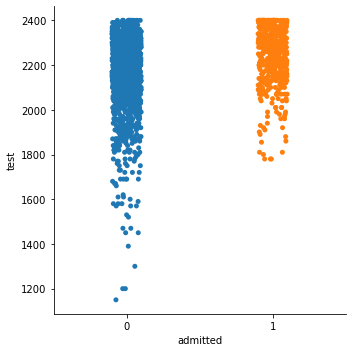

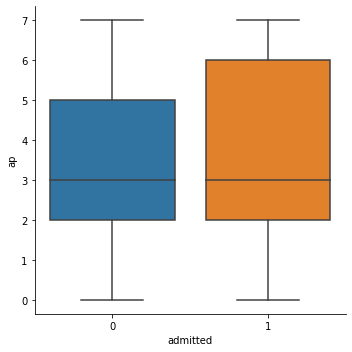

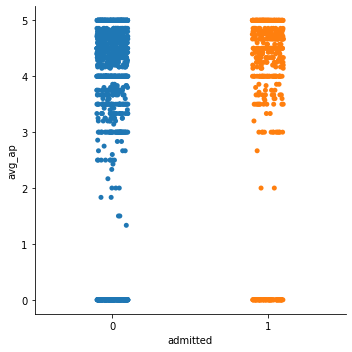

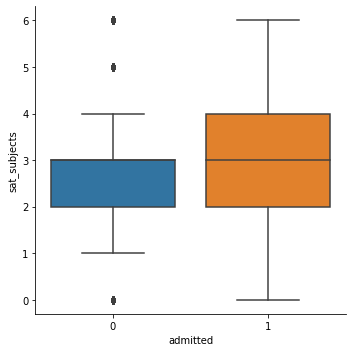

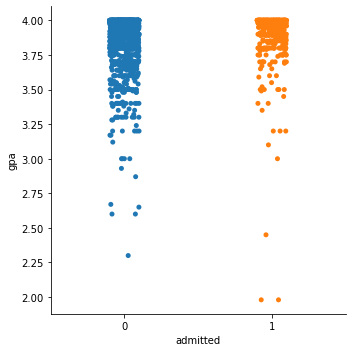

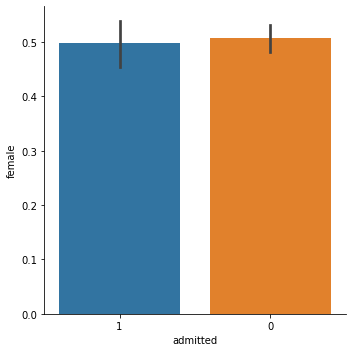

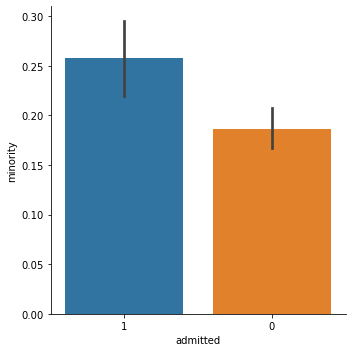

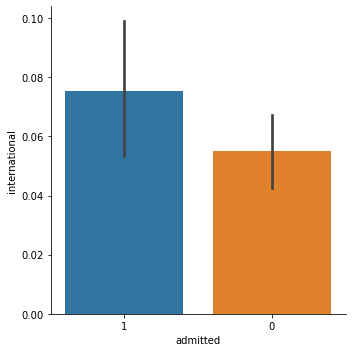

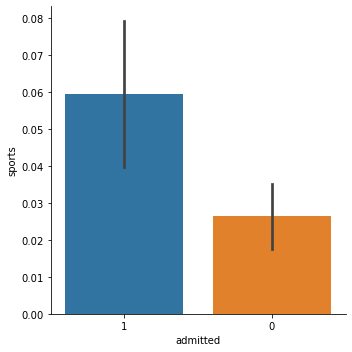

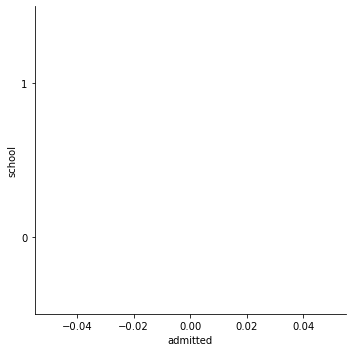

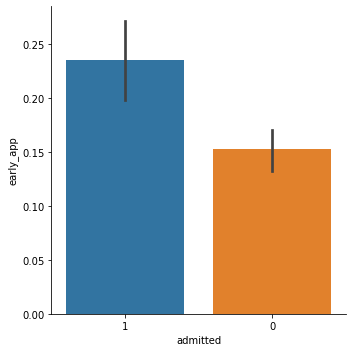

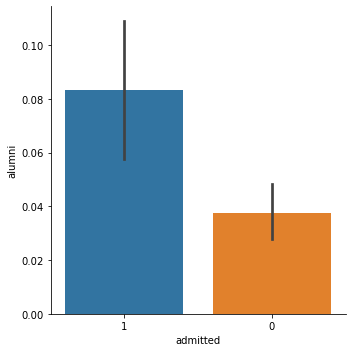

In [714]:
# your code here

#fig = plt.figure(figsize = (24,24))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)

predictors = [
    'test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','school','early_app','alumni']
plots = [2,4]
bar = [1,3]

#ax = fig.add_subplot(4, 3, 1)
    
sns.catplot(x = "admitted", y = "test", data = college[['admitted','test']])
sns.catplot(x="admitted", y="ap",  kind="box", data=college[['admitted','ap']])
sns.catplot(x = "admitted", y = "avg_ap", data = college[['admitted','avg_ap']])    
sns.catplot(x="admitted", y="sat_subjects",  kind="box", data=college[['admitted','sat_subjects']])
sns.catplot(x = "admitted", y = "gpa", data =college[['admitted','gpa']])    
sns.catplot(x = "admitted", y = "female", kind = "bar", order = [1,0],  data = college[['admitted','female']])    
sns.catplot(x = "admitted", y = "minority", kind = "bar", order = [1,0],  data = college[['admitted','minority']])    
sns.catplot(x = "admitted", y = "international", kind = "bar", order = [1,0],  data = college[['admitted','international']])    
sns.catplot(x = "admitted", y = "sports", kind = "bar", order = [1,0],  data = college[['admitted','sports']])    
sns.catplot(x = "admitted", y = "school", kind = "bar", order = [1,0],  data = college[['admitted','school']])    
sns.catplot(x = "admitted", y = "early_app", kind = "bar", order = [1,0],  data = college[['admitted','early_app']])    
sns.catplot(x = "admitted", y = "alumni", kind = "bar", order = [1,0],  data = college[['admitted','alumni']])    



<div class='exercise-r'>  
 
**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?
 
 
 </div>

**INTERPRETATION:**

test seems to be the most important. This is likely a good predictor since it is the most standardized method for which an applications team can judge a student. 

<div class='exercise-r'>  
 
**1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  Interpret the coefficient estimates: which college is estimated to be easier to get into?  What are the estimated chances of getting into each school?
 
 
 </div>

In [715]:
features_harvard = ['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard']

features_yale = ['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','yale']
features_harvard_yale = ['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard','yale']

#train
accept_train = college_train[['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard','yale']]
harvard_train_orig = accept_train[accept_train['harvard'] == 1]
yale_train_orig = accept_train[accept_train['yale'] == 1]


#test
accept_test = college_test[['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard','yale']]
harvard_test_orig = accept_test[accept_test['harvard'] == 1]
yale_test_orig = accept_test[accept_test['yale'] == 1]


#standardize
scaler_harvard = StandardScaler().fit(harvard_train_orig[features_harvard])
scaler_yale = StandardScaler().fit(yale_train_orig[features_yale])
scaler_harvard_yale = StandardScaler().fit(college_train[features_harvard_yale])

# This converts our matrices into numpy matrices
harvard_train_np = scaler_harvard.transform(harvard_train_orig[features_harvard])
harvard_test_np = scaler_harvard.transform(harvard_test_orig[features_harvard])

hy_train_np = scaler_harvard_yale.transform(college_train[features_harvard_yale])
hy_test_np = scaler_harvard_yale.transform(college_test[features_harvard_yale])

yale_train_np = scaler_yale.transform(yale_train_orig[features_yale])
yale_test_np = scaler_yale.transform(yale_test_orig[features_yale])

# Making the numpy matrices pandas dataframes
harvard_train = pd.DataFrame(harvard_train_np, columns = features_harvard)
harvard_test = pd.DataFrame(harvard_test_np, columns = features_harvard)

yale_train = pd.DataFrame(yale_train_np, columns = features_yale)
yale_test = pd.DataFrame(yale_test_np, columns = features_yale)

hy_train = pd.DataFrame(hy_train_np, columns = features_harvard_yale)
hy_test = pd.DataFrame(hy_test_np, columns = features_harvard_yale)
   

#fix admitted
for row in yale_train.index:
    if yale_train['admitted'][row] > 1:
        yale_train['admitted'][row] = 1
    else:
        yale_train['admitted'][row] = 0

#not sure why harvard isn't working here

for row in harvard_train.index:
    if harvard_train['admitted'][row] > 1:
        harvard_train['admitted'][row] = 1
    else:
        harvard_train['admitted'][row] = 0
#dfg
for row in yale_test.index:
    if yale_test['admitted'][row] > 1:
        yale_test['admitted'][row] = 1
    else:
        yale_test['admitted'][row] = 0

#not sure why harvard isn't working here

for row in harvard_test.index:
    if harvard_test['admitted'][row] > 1:
        harvard_test['admitted'][row] = 1
    else:
        harvard_test['admitted'][row] = 0        
#random
       
for row in hy_train.index:
    if hy_train['admitted'][row] > 0:
        hy_train['admitted'][row] = 1
    else:
        hy_train['admitted'][row] = 0        
#dfg    

for row in hy_test.index:
    if hy_test['admitted'][row] > 0:
        hy_test['admitted'][row] = 1
    else:
        hy_test['admitted'][row] = 0  
        


In [716]:
hy_test.head()

,admitted,test,ap,avg_ap,sat_subjects,gpa,female,minority,international,sports,early_app,alumni,harvard,yale
0,0.0,-0.149930,1.098976,0.358355,0.880745,0.610095,1.0,-0.510216,-0.253005,-0.189766,2.155292,-0.228121,-1.049344,1.049344
1,0.0,-2.737367,-0.615828,-0.131932,0.880745,0.108169,1.0,1.959955,-0.253005,-0.189766,2.155292,-0.228121,-1.049344,1.049344
2,0.0,-0.561568,-0.615828,0.162241,0.105233,0.610095,1.0,-0.510216,-0.253005,-0.189766,-0.463974,-0.228121,0.952976,-0.952976
3,0.0,-0.032319,-1.473230,-2.191139,-0.670278,0.610095,-1.0,1.959955,3.952496,-0.189766,-0.463974,-0.228121,-1.049344,1.049344
4,0.0,1.026178,0.241574,0.750585,0.105233,-0.393757,1.0,-0.510216,-0.253005,-0.189766,-0.463974,-0.228121,0.952976,-0.952976


In [717]:
# your code here

#Training
model_logistic_harvard = LogisticRegression(C=100).fit(harvard_train[['test','ap','avg_ap','sat_subjects','gpa','female','minority','international','sports','early_app','alumni']], harvard_train['admitted'])
model_logistic_yale = LogisticRegression(C=100).fit(yale_train[['test','ap','avg_ap','sat_subjects','gpa','female','minority','international','sports','early_app','alumni']], yale_train['admitted'])

logit1_4 = model_logistic_harvard

#Predict
harvard_pred_train = model_logistic_harvard.predict(harvard_train[['test','ap','avg_ap','sat_subjects','gpa','female',
'minority','international','sports','early_app','alumni']])
yale_pred_train = model_logistic_yale.predict(yale_train[['test','ap','avg_ap','sat_subjects','gpa','female',
'minority','international','sports','early_app','alumni']])

#print coef
print("The coefficients for the harvard logistic regression model are:", model_logistic_harvard.coef_ )
print("The coefficients for the yale logistic regression model are:", model_logistic_yale.coef_ )

#count of accepted students for each 
h_admitted_count = len(college[(college['harvard'] == 1) & (college['admitted']==1)])
h_total_count = len(college[college['harvard'] ==1])
h_acceptance_rate = 100*(h_admitted_count / h_total_count)

y_admitted_count = len(college[(college['yale'] == 1) & (college['admitted']==1)])
y_total_count = len(college[college['yale'] ==1])
y_acceptance_rate = 100*(y_admitted_count / y_total_count)

#print acceptance rate
print("The harvard acceptance rate is: %5.3f" %h_acceptance_rate +  "%" )
print("The yale acceptance rate is: %5.3f" %y_acceptance_rate +  "%" )

accuracy_score_train = logit1_4.score(harvard_train[['test','ap','avg_ap','sat_subjects','gpa','female',
'minority','international','sports','early_app','alumni']], harvard_train['admitted'])*100
print(accuracy_score_train)

The coefficients for the harvard logistic regression model are: [[ 0.91340071 -0.30041764  0.26458648 -0.21461031  0.09702263  0.09824653
   0.27622305  0.14473778  0.21985063  0.03924397  0.19658303]]
The coefficients for the yale logistic regression model are: [[ 0.62480907  0.0610891  -0.09775765  0.01864398  0.13588521 -0.04946762
   0.49464562  0.06936585  0.2226719   0.23664156  0.09334614]]
The harvard acceptance rate is: 28.746%
The yale acceptance rate is: 25.056%
74.23469387755102


**INTERPRETATION:**

Acceptance rate is one way to look at the challenge of gettting into the school. In this sense, it is harder to get into Yale. However, our coefficients tell a more complex story. The coefficients show that certain aspects of a candidate have a strong bearing on their overall likelihood of getting into the school. You need a higher test score to get into harvard from the weighting placed on that by our coefficients. Yale takes things like being a minority more importantly than harvard.

<div class='exercise-r'>  
 
**1.5** Create a contingency table between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope).
 
 
 </div>

In [718]:
# your code here
data_crosstab = pd.crosstab(harvard_train['admitted'],  
                            harvard_train['harvard'], 
                                margins = False) 
print(data_crosstab) 

a = 217/(567+ 217)*100
print("The percent chance of getting into harvard is %5.3f" %a + "%")

harvard   0.0
admitted     
0.0       567
1.0       217
The percent chance of getting into harvard is 27.679%


This shows a slightly lower percentage chance of getting in, but very similar, only .1% different.

<div class='exercise-r'>  
    
**1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?
</div>

**INTERPRETATION:**

Acceptance rates in our data set are much higher than the actual rates. The data we are leveraging is volunteered data. Maybe students are less likely to offer up their college board data if they are less confident that they'll get into the school? I think there are a lot of potential reasons to guess why this could happen although it seems impossible to me to know what the difference is without digging into the source of our data. 

---

<div class='exercise'><b> Question 2 [18 pts]: Interpretable Modeling </b></div>

**2.1** Fit a logistic regression model to predict `admitted` from `test` alone (call it `logit2_1`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data). 

**2.2** What are the estimated chances of an applicant being admitted with an *average* `test` score of 2200?  What about if they had a perfect test score of 2400?  What test score would be needed to have a 50-50 chance of being admitted?

**2.3**  Fit a logistic regression model to predict `admitted` from `test` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data). 

**2.4** Interpret the coefficient estimates in `logit2_3` (not the intercept) and compare the coefficient estimate for `test` to the one from `logit2_1`.  Why has this estimate changed?

**Hint:** You may want to inspect the relationship between `test` and `avg_ap` to help get a better sense for what might be happening here.

**2.5** Interpret and compare the classification accuracies for the two models (`logit2_1` and `logit2_3`).  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar of different? 


<div class='exercise-r'>  
 
**2.1** Fit a logistic regression model to predict `admitted` from `test` alone (call it `logit2_1`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data).
 
 </div>

In [719]:
harvard_train = harvard_train_orig[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority', 'admitted']]
harvard_test = harvard_test_orig[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority', 'admitted']]


In [720]:
#logistic regression trained from just the test alone
test_logistic_harvard = LogisticRegression(penalty='none', max_iter = 5000).fit(harvard_train[['test']], harvard_train['admitted'])
#test_logistic_yale = LogisticRegression(C=100).fit(yale_train_orig[['test']], yale_train['admitted'])

logit2_1 = test_logistic_harvard

#predict based off model
y_pred_train = logit2_1.predict(harvard_train[['test']])
y_pred_test = logit2_1.predict(harvard_test[['test']])

#measure accuracy
accuracy_score_train = logit2_1.score(harvard_train[['test']], harvard_train['admitted'])*100
accuracy_score_test = logit2_1.score(harvard_test[['test']], harvard_test['admitted'])*100


print("The intercept and coefficient for the harvard logistic regression model are:",test_logistic_harvard.intercept_ , test_logistic_harvard.coef_ )

#print("The intercept and coefficient for the yale logistic regression model are:", test_logistic_yale.intercept_, test_logistic_yale.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")



The intercept and coefficient for the harvard logistic regression model are: [-2.29470386e-07] [[-0.00041835]]
The classification accuracy for the train model is: 72.321 %
The classification accuracy for the test model is: 67.005 %


<div class='exercise-r'>  
 
**2.2** What are the estimated chances of an applicant being admitted with an *average* `test` score of 2200?  What about if they had a perfect test score of 2400?  What test score would be needed to have a 50-50 chance of being admitted?
 
 </div>

In [721]:
def standardization(x, data):
    z = ((x - float(data.mean()))/(float(data.std())))
    
    return z

In [722]:
def unstandardize(z, data):
    x = (z* float(data.std()) + float(data.mean()) )
    
    return x

In [723]:
# your code here

b0 = logit2_1.intercept_
b1 = logit2_1.coef_

stand_22 = standardization(2200,harvard_train_orig[['test']])
stand_24 = standardization(2400,harvard_train_orig[['test']])


a = (1/(1+ math.exp(-(b1* 2200 - b0 ))))*100
print("chances with 2200 test score: %5.3f"  %a  +   "%")
b = (1/(1+ math.exp(-(b1* 2400 - b0 ))))*100
print("chances with 2400 test score: %5.3f"  %b  +   "%")

#calc 50/50
z = b0/b1 
x = unstandardize(z, harvard_train_orig[['test']])

print("The 50/50 point occurs at a score of: %7.3f" %x)


chances with 2200 test score: 28.488%
chances with 2400 test score: 26.815%
The 50/50 point occurs at a score of: 2183.076


*Your answer here*
Not sure why the results I got seem to be so unrepresentative and honestly reversed. Things worked when I standardized the data which I think was the main issue?
chances with 2400 test score: 26.815%
The 50/50 point occurs at a score of: 2183.076

when I standardized I got the following

chances with 2200 test score: 75.954%
chances with 2400 test score: 88.131%
The 50/50 point occurs at a score of: 1930.886

**Interpretation:**

<div class='exercise-r'>  
 
**2.3**  Fit a logistic regression model to predict `admitted` from `test` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data).
 
 </div>

In [724]:
harvard_train = harvard_train_orig[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority', 'admitted']]
harvard_test = harvard_test_orig[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority', 'admitted']]


In [725]:
# your code here
#logistic regression trained from just the test alone
logit2_3 = LogisticRegression(penalty='none', max_iter = 5000).fit(harvard_train[['test','avg_ap']], harvard_train_orig['admitted'])
#test_logistic_yale = LogisticRegression(C=100).fit(yale_train_orig[['test']], yale_train['admitted'])



#predict based off model
y_pred_train = logit2_3.predict(harvard_train[['test','avg_ap']])
y_pred_test = logit2_3.predict(harvard_test[['test','avg_ap']])

#measure accuracy
accuracy_score_train = accuracy_score(harvard_train['admitted'], y_pred_train)*100
accuracy_score_test = accuracy_score(harvard_test['admitted'], y_pred_test)*100


print("The intercept and coefficient for the harvard logistic regression model are:",logit2_3.intercept_ , logit2_3.coef_ )

#print("The intercept and coefficient for the yale logistic regression model are:", test_logistic_yale.intercept_, test_logistic_yale.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")


The intercept and coefficient for the harvard logistic regression model are: [-10.51078464] [[ 0.00435934 -0.0223982 ]]
The classification accuracy for the train model is: 72.321 %
The classification accuracy for the test model is: 67.005 %


<div class='exercise-r'>  
 
**2.4** Interpret the coefficient estimates in `logit2_3` (not the intercept) and compare the coefficient estimate for `test` to the one from `logit2_1`.  Why has this estimate changed?
 
 **Hint:** You may want to inspect the relationship between `test` and `avg_ap` to help get a better sense for what might be happening here.
 
 </div>

In [726]:
# your code here

b0 = logit2_3.intercept_
b1 =   0.75237062
b2 = -0.0383941

print(b1)

stand_22 = standardization(2200,harvard_train_orig[['test']])
stand_24 = standardization(2400,harvard_train_orig[['test']])
stand_ap = standardization(5,harvard_train_orig[['avg_ap']])


a = (1/(1+ math.exp(-(b1* stand_22 + b2*stand_ap - b0 ))))*100
print("chances with 2200 test score and ap avg of 4: %5.3f"  %a  +   "%")
b = (1/(1+ math.exp(-(b1* stand_24 + b2*stand_ap - b0 ))))*100
print("chances with 2400 test score and ap avg of 4: %5.3f"  %b  +   "%")


0.75237062
chances with 2200 test score and ap avg of 4: 99.997%
chances with 2400 test score and ap avg of 4: 99.999%


Text(0.5, 1.0, 'test scores vs avg ap')

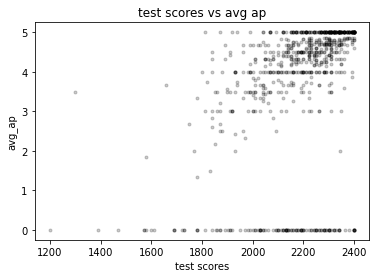

In [727]:
plt.plot(harvard_train_orig[['test']], harvard_train_orig[['avg_ap']],'ok', markersize = 3, alpha = .2)
plt.axis()

plt.xlabel('test scores')
plt.ylabel('avg_ap')
plt.title('test scores vs avg ap')

**INTERPRETATION:**


*Your answer here*
The estimates have changed quite a bit. My coefficient for the test group got larger and the avg_ap coef is larger than the one for test. Test is still more important to the admission probability since the scale of the test numbers is much larger than those of the avg_ap scores. You can see that there appears to be some collinearity at play between test and avg_ap.

<div class='exercise-r'>  
    
**2.5** Interpret and compare the classification accuracies for the two models (`logit2_1` and `logit2_3`).  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar of different?
</div>

**INTERPRETATION:**

*Your answer here* I think what would really help us understand these beta values better is to have them scaled so we can better understand them relative to one another. standardization of the data set would be the answer here to making them more interpretable. The accuracies of the two models are the same from 2_1 to 2_3, I think that the collinearity of test scores and avg ap may have some role to play in it, alongside what I am interpretting as a low importance with regard to the weight of avg_ap relative to test in our models when they were generated?

---

<div class='exercise'><b> Question 3 [30 pts]: Harvard and Yale? </b></div>


**3.1** Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']`.  Output and interpret the coefficient estimates for the binary predictors in this model.

**Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.

**3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `['harvard', 'test', 'ap']` along with the 2 interaction terms: `harvard` with `test` and `harvard` with `ap`. Name the columns for these interaction terms something sensible.  Print out the coefficient estimates for this model.

**3.3** Simplify and write out mathematically the above model from question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$

**Note:** All of your mathematical statements should be written out in your markdown cells [using LaTeX](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd). Do not insert images of handwritten math!

**3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test` as a function of `ap` would an applicant be predicted to more likely than not be admitted into the college they applied? If a student scored a perfect 2400 on `test`, what is the minimum number of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?

**3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (both the location of the boundaries and where the points lie around these boundaries).

**Note:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret.

**3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `['harvard', 'test', 'female', 'minority']` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`.  Print out the coefficient estimates for this model.

**3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).

**3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting these groups?  Why would it be wrong to take this interpretation as truth?

<div class='exercise-r'>  
 
**3.1** Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']`.  Output and interpret the coefficient estimates for the binary predictors in this model.
 
 **Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.
 
 </div>

In [728]:
hy_train = harvard_train_orig[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority', 'admitted']]
hy_test = harvard_test_orig[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority', 'admitted']]


In [729]:
# your code here
logit3_1 = LogisticRegression(penalty='none', max_iter = 500).fit(hy_train[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female',
                                            'minority']], hy_train['admitted'])
#test_logistic_yale = LogisticRegression(C=100).fit(yale_train_orig[['test']], yale_train['admitted'])


#predict based off model
y_pred_train = logit3_1.predict(hy_train[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']])
y_pred_test = logit3_1.predict(hy_test[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']])

#measure accuracy
accuracy_score_train = accuracy_score(hy_train['admitted'], y_pred_train)*100
accuracy_score_test = accuracy_score(hy_test['admitted'], y_pred_test)*100


print("The intercept and coefficient for the harvard + yale logistic regression model are:",logit3_1.intercept_ , logit3_1.coef_ )

#print("The intercept and coefficient for the yale logistic regression model are:", test_logistic_yale.intercept_, test_logistic_yale.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")


The intercept and coefficient for the harvard + yale logistic regression model are: [-6.28698778] [[-6.28698778e+00  4.84923755e-03 -1.17217982e-01  7.14916308e-02
   2.11943259e-01  1.57066141e-01  6.07077572e-01]]
The classification accuracy for the train model is: 73.087 %
The classification accuracy for the test model is: 65.990 %


**INTERPRETATION:**

If we standardized our data it would be much easier to compare the effects of all of our betas. Speaking to the two binary predictors minority and female (excluding harvard here) it seems that the chances of being admitted increase for both positives states (being female or a minority) and that being a minority has about 4 times the weight of being female. 

accuracy seems to have gone down slightly for this model. I'm a bit confused by this as I would have assumed the additional variables would have helped us to predict better. 


<div class='exercise-r'>  
 
**3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `['harvard', 'test', 'ap']` along with the 2 interaction terms: `harvard` with `test` and `harvard` with `ap`. Name the columns for these interaction terms something sensible.  Print out the coefficient estimates for this model.
 
 </div>

In [730]:
#use non-standardized hy_train
hy_train = harvard_train_orig[['harvard','test','ap','admitted']]
hy_test = harvard_test_orig[['harvard','test','ap','admitted']]


In [731]:
hy_train['harvard_test'] = hy_train.apply(lambda row: row.harvard * row.test, axis = 1) 
hy_train['harvard_ap'] = hy_train.apply(lambda row: row.harvard * row.ap, axis = 1) 

hy_test['harvard_test'] = hy_test.apply(lambda row: row.harvard * row.test, axis = 1) 
hy_test['harvard_ap'] = hy_test.apply(lambda row: row.harvard * row.ap, axis = 1) 

display(hy_train)

# your code here
logit3_2 = LogisticRegression(penalty='none', max_iter = 1000).fit(hy_train[['harvard', 'test', 'ap', 
                                                    'harvard_ap', 'harvard_test']], hy_train['admitted'])

#predict based off model
y_pred_train = logit3_2.predict(hy_train[['harvard', 'test', 'ap', 'harvard_ap', 'harvard_test']])
y_pred_test = logit3_2.predict(hy_test[['harvard', 'test', 'ap', 'harvard_ap', 'harvard_test']])

#measure accuracy
accuracy_score_train = accuracy_score(hy_train['admitted'], y_pred_train)*100
accuracy_score_test = accuracy_score(hy_test['admitted'], y_pred_test)*100


print("The intercept and coefficient for the harvard + yale logistic regression model are:",logit3_2.intercept_ , logit3_2.coef_ )

#print("The intercept and coefficient for the yale logistic regression model are:", test_logistic_yale.intercept_, test_logistic_yale.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")


/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,harvard,test,ap,admitted,harvard_test,harvard_ap
584,1,2080,5,0,2080,5
3,1,2400,5,1,2400,5
383,1,2220,5,0,2220,5
1601,1,2250,5,1,2250,5
504,1,2150,2,0,2150,2
...,...,...,...,...,...,...
587,1,2080,0,0,2080,0
368,1,2230,5,0,2230,5
648,1,2020,0,0,2020,0
121,1,2340,0,0,2340,0


The intercept and coefficient for the harvard + yale logistic regression model are: [-5.51967071] [[-5.51967071e+00  2.34580738e-03 -4.17730452e-02 -4.17730452e-02
   2.34580738e-03]]
The classification accuracy for the train model is: 73.214 %
The classification accuracy for the test model is: 65.990 %


In [732]:
y_train = yale_train_orig[['yale','test','ap','admitted']]
y_test = yale_test_orig[['yale','test','ap','admitted']]
#recognizing now after the fact that I did not need ot use seperate yale_train_orig and harvard_train_orig

y_train['yale_test'] = y_train.apply(lambda row: row.yale * row.test, axis = 1) 
y_train['yale_ap'] = y_train.apply(lambda row: row.yale * row.ap, axis = 1) 

y_test['yale_test'] = y_test.apply(lambda row: row.yale * row.test, axis = 1) 
y_test['yale_ap'] = y_test.apply(lambda row: row.yale * row.ap, axis = 1) 

display(y_train)

logit3_2 = LogisticRegression(penalty='none', max_iter = 1000).fit(y_train[['yale', 'test', 'ap', 
                                                        'yale_ap', 'yale_test']], y_train['admitted'])
#predict based off model
y_pred_train = logit3_2.predict(y_train[['yale', 'test', 'ap', 'yale_ap', 'yale_test']])
y_pred_test = logit3_2.predict(y_test[['yale', 'test', 'ap', 'yale_ap', 'yale_test']])

#measure accuracy
accuracy_score_train = accuracy_score(y_train['admitted'], y_pred_train)*100
accuracy_score_test = accuracy_score(y_test['admitted'], y_pred_test)*100


print("The intercept and coefficient for the harvard + yale logistic regression model are:",logit3_2.intercept_ , logit3_2.coef_ )

#print("The intercept and coefficient for the yale logistic regression model are:", test_logistic_yale.intercept_, test_logistic_yale.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,yale,test,ap,admitted,yale_test,yale_ap
1817,1,2190,6,1,2190,6
1308,1,2140,2,0,2140,2
1336,1,2120,6,0,2120,6
908,1,2330,0,0,2330,0
1768,1,2310,5,0,2310,5
...,...,...,...,...,...,...
1344,1,2110,7,0,2110,7
1383,1,2080,3,1,2080,3
1520,1,1450,5,0,1450,5
1070,1,2260,2,1,2260,2


The intercept and coefficient for the harvard + yale logistic regression model are: [-0.00369134] [[-0.00369134 -0.0002947   0.03116918  0.03116918 -0.0002947 ]]
The classification accuracy for the train model is: 75.281 %
The classification accuracy for the test model is: 73.596 %


<div class='exercise-r'>  
 
**3.3** Simplify and write out mathematically the above model from question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:
 
 $$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$
 
 **Note:** All of your mathematical statements should be written out in your markdown cells [using LaTeX](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd). Do not insert images of handwritten math!
 
 </div>

**ANSWER:**

*Note: mathematical statements should be written using LaTeX.*

*Your answer here*
for harvard: $$ p =  1/(1+ e^{ -(-5.5197 -5.5197e+00*X1 + 2.35e-03*X2 -4.18e-02*X3 -4.18e-028*X4
   + 2.346e-03*X5)} ) $$ 
 
The equation for Yale would be nearly identical, the process would to repeat what I did above but instead isolate yale and yale based interaction terms 

for yale: $$ p =  1/(1+ e^{ -(-0.00369 -0.00369X1 -0.00029X2 +  0.031X3 + 0.031X4 -0.00029X5 ]} ) $$  

note that the harvard and yale beta terms are the same as the intercept. This makes sense as we are looking at admissions someone needs to apply to the school in order to be admitted. I tried to reduce as I saw fit with regards to sig figs. Note that the values for the harvard test and harvar_ap (as well as there yale counterparts) are equal in value to the test and avg_ap betas. This is because we are only multiplying them by 1. This becomes more clear upon looking at the dataframe. 

<div class='exercise-r'>  
 
**3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test` as a function of `ap` would an applicant be predicted to more likely than not be admitted into the college they applied? If a student scored a perfect 2400 on `test`, what is the minimum number of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?
 
 </div>

**ANSWER:**
can ignore the intercept and first term since they are identical. 
X2 = test
X3 = ap_avg
since beta2 and beta3 are identical to the results we get from the beta 4 and beta 5, we can concern ourselves only with 2X2 and 2X3 simplifying our formula to the following. Since there are two 2's we can distribute them. 
set p to 0.5 for our first classification boundary. 

$$ p =  0.5 1/(1+𝑒{−(2.35𝑒−03*2*𝑋2−4.18𝑒−02∗2*𝑋3))} $$
$$ 0.5  = 1/(1+𝑒{−2(2.35𝑒−03*𝑋2−4.18𝑒−02*𝑋3))}$$
$$1 = 𝑒{−2(2.35𝑒−03*𝑋2−4.18𝑒−02*𝑋3))}$$
$$0 = (2.35𝑒−03*𝑋2−4.18𝑒−02*𝑋3)$$
$$x3 = (2.35e-03 * 2400)/4.18e-02)$$
$$x3 = (2.35e-03 * 2400)/4.18e-02)$$
x3 = 134.93
This doesn't make any sense, not entirely sure where I went wrong with my math. Its clear that we can't get a score this high in the avg AP. I had a similar conundrum earlier when I was rolling back my math. 

In [733]:
x3 = (2.35e-03 * 2400)/4.18e-02
x3

134.9282296650718

*Your answer here*

<div class='exercise-r'>  
 
**3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (both the location of the boundaries and where the points lie around these boundaries).
 
 **Note:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret.
 
 </div>

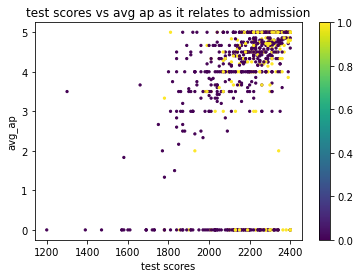

In [734]:
#plt.pcolormesh(x1v, x2v, yhat1.reshape(x1v.shape),alpha = 0.05) 
plt.scatter(harvard_train_orig[['test']],harvard_train_orig[['avg_ap']],c=harvard_train_orig['admitted'], s = 5)
plt.xlabel('test scores')
plt.ylabel('avg_ap')
plt.title('test scores vs avg ap as it relates to admission')
plt.colorbar()
plt.show()

**INTERPRETATION:**

My classification boundary does not make logical sense at the moment so I have omitted it from this graph. 

<div class='exercise-r'>  
 
**3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `['harvard', 'test', 'female', 'minority']` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`.  Print out the coefficient estimates for this model.
 
 </div>

In [735]:
# your code here
hy_train = harvard_train_orig[['harvard', 'test', 'female', 'minority','admitted']]
hy_test = harvard_test_orig[['harvard', 'test', 'female', 'minority', 'admitted']]

hy_train['harvard_female'] = hy_train.apply(lambda row: row.harvard * row.female, axis = 1) 
hy_train['harvard_minority'] = hy_train.apply(lambda row: row.harvard * row.minority, axis = 1) 

hy_test['harvard_test'] = hy_test.apply(lambda row: row.harvard * row.female, axis = 1) 
hy_test['harvard_ap'] = hy_test.apply(lambda row: row.harvard * row.minority, axis = 1) 

display(hy_train)

# your code here
logit3_6 = LogisticRegression(penalty='none', max_iter = 1000).fit(hy_train[['harvard', 'test', 
                                                    'female', 'minority']], hy_train['admitted'])

#predict based off model
y_pred_train = logit3_6.predict(hy_train[['harvard', 'test', 'female', 'minority']])
y_pred_test = logit3_6.predict(hy_test[['harvard', 'test', 'female', 'minority']])

#measure accuracy
accuracy_score_train = accuracy_score(hy_train['admitted'], y_pred_train)*100
accuracy_score_test = accuracy_score(hy_test['admitted'], y_pred_test)*100

print("The intercept and coefficient for the harvard  logistic regression model are:",logit3_6.intercept_ , logit3_6.coef_ )

#print("The intercept and coefficient for the yale logistic regression model are:", test_logistic_yale.intercept_, test_logistic_yale.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")

/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stevenmorse/opt/anaconda3/envs/cs109a_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,harvard,test,female,minority,admitted,harvard_female,harvard_minority
584,1,2080,1,0,0,1,0
3,1,2400,1,0,1,1,0
383,1,2220,0,0,0,0,0
1601,1,2250,0,0,1,0,0
504,1,2150,0,1,0,0,1
...,...,...,...,...,...,...,...
587,1,2080,1,0,0,1,0
368,1,2230,0,0,0,0,0
648,1,2020,1,0,0,1,0
121,1,2340,0,0,0,0,0


The intercept and coefficient for the harvard  logistic regression model are: [-2.29470699e-07] [[-2.29470699e-07 -4.18350715e-04 -9.86132440e-08 -3.77187068e-08]]
The classification accuracy for the train model is: 72.321 %
The classification accuracy for the test model is: 67.005 %


<div class='exercise-r'>  
 
**3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).
 
 </div>

**INTERPRETATION:**

There is really no affect associated here since the interaction terms are only being matched against the harvard term which is binary and a part of the data already. The correlation to our training will always be 0 when harvard is 0 so the interaction doesn't change anything. The two main effects, being the minority and female terms show a minimal effect when compared to the test term, but the model seems to show a positive correlation to being a minority and female. Minority has a higher weight than being female. 

<div class='exercise-r'>  
    
**3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting these groups?  Why would it be wrong to take this interpretation as truth?
</div>

In [736]:
y_train = yale_train_orig[['yale', 'test', 'ap', 'avg_ap', 'gpa', 'female',
                                            'minority','admitted']]
y_test = yale_test_orig[['yale', 'test', 'ap', 'avg_ap', 'gpa', 'female',
                                            'minority', 'admitted']]

# your code here
logit3_8 = LogisticRegression(penalty='none', max_iter = 500).fit(y_train[['yale', 'test', 'ap', 'avg_ap', 'gpa', 'female',
                                            'minority']], y_train['admitted'])
#test_logistic_yale = LogisticRegression(C=100).fit(yale_train_orig[['test']], yale_train['admitted'])


#predict based off model
y_pred_train = logit3_8.predict(y_train[['yale', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']])
y_pred_test = logit3_8.predict(y_test[['yale', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']])

#measure accuracy
accuracy_score_train = accuracy_score(y_train['admitted'], y_pred_train)*100
accuracy_score_test = accuracy_score(y_test['admitted'], y_pred_test)*100


print("The intercept and coefficient for the yale logistic regression model are:",logit3_8.intercept_ , logit3_8.coef_ )

#print("The intercept and coefficient for the yale logistic regression model are:", test_logistic_yale.intercept_, test_logistic_yale.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")


The intercept and coefficient for the yale logistic regression model are: [-6.47084081] [[-6.47084081e+00  3.67427147e-03  2.97154728e-02 -5.29198240e-02
   9.25971272e-01 -1.52344404e-01  1.24873021e+00]]
The classification accuracy for the train model is: 76.404 %
The classification accuracy for the test model is: 73.596 %


**INTERPRETATION:**

*Your answer here*

both schools weigh being a minority highly in there admissions process. From the data, it appears this is more beneficial at yale than harvard. It is hard to take this as fact since our model is only 73% accurate. There are also issues with interpretting causation from these two factors. 

---

<div class='exercise'><b> Question 4 [24 pts]: Building Predictive Models for admitted </b></div>

**4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regression and/or distance-based algorithms such as $k$-NN classification. (1) Please explain why scaling under these circumstances might be important. Then, (2) actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors (for both the training and test sets).

**Note:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set.

**4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1,3,5,9,15,21,51,71,101,151,201]` and 3-fold cross-validation. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, report your chosen $k$ and the classification accuracy on train and test for your final fitted model.

**4.3** Fit the full logistic regression model with main effects of all 12 predictors in it (call it `logit_full`). Print out the coefficient estimates and report the classification accuracy on train and test for this model.

**4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation.  Print out the coefficient estimates and report the classification accuracy on train and test for this model.

**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant? 

**4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the 2-way interactions between them (call it `logit_lasso_interact`).  Again use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation. Report the classification accuracy on train and test for this model.

**4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? (Feel free to just report on the number of them found to be important and unimportant. There is no need to list them all here.)

**Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.

<div class='exercise-r'>  
 
**4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regression and/or distance-based algorithms such as $k$-NN classification. (1) Please explain why scaling under these circumstances might be important. Then, (2) actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors (for both the training and test sets).
 
 **Note:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set.
 
 </div>

**INTERPRETATION:**

standardization will be important for the interpretability of our coefficients. With the standardization, we will have better insight into beta values relative to one another. 

In [737]:
# your code here
features_harvard = ['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard']
features_yale = ['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','yale']
features_harvard_yale = ['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard','yale']

#train
accept_train = college_train[['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard','yale']]
harvard_train_orig = accept_train[accept_train['harvard'] == 1]
yale_train_orig = accept_train[accept_train['yale'] == 1]
#test
accept_test = college_test[['admitted','test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard','yale']]
harvard_test_orig = accept_test[accept_test['harvard'] == 1]
yale_test_orig = accept_test[accept_test['yale'] == 1]

#standardize
scaler_harvard = StandardScaler().fit(harvard_train_orig[features_harvard])

# This converts our matrices into numpy matrices
harvard_train_np = scaler_harvard.transform(harvard_train_orig[features_harvard])
harvard_test_np = scaler_harvard.transform(harvard_test_orig[features_harvard])

# Making the numpy matrices pandas dataframes
harvard_train = pd.DataFrame(harvard_train_np, columns = features_harvard)
harvard_test = pd.DataFrame(harvard_test_np, columns = features_harvard)
   
#need to remove the scalars from test     

#fix binaries (definitly a better way to do this)
for row in harvard_train.index:
    if harvard_train['admitted'][row] > 1:
        harvard_train['admitted'][row] = 1
    else:
        harvard_train['admitted'][row] = 0
    
    if harvard_train['female'][row] > 1:
        harvard_train['female'][row] = 1
    else:
        harvard_train['female'][row] = 0
    
    if harvard_train['minority'][row] > 1:
        harvard_train['minority'][row] = 1
    else:
        harvard_train['minority'][row] = 0
        
    if harvard_train['sports'][row] > 1:
        harvard_train['sports'][row] = 1
    else:
        harvard_train['sports'][row] = 0
    
    if harvard_train['alumni'][row] > 1:
        harvard_train['alumni'][row] = 1
    else:
        harvard_train['alumni'][row] = 0
        
    if harvard_train['early_app'][row] > 1:
        harvard_train['early_app'][row] = 1
    else:
        harvard_train['early_app'][row] = 0
    
    if harvard_train['harvard'][row] > 1:
        harvard_train['harvard'][row] = 1
    else:
        harvard_train['harvard'][row] = 0
        
for row in harvard_test.index:
    if harvard_test['admitted'][row] > 1:
        harvard_test['admitted'][row] = 1
    else:
        harvard_test['admitted'][row] = 0
    
    if harvard_test['female'][row] > 1:
        harvard_test['female'][row] = 1
    else:
        harvard_test['female'][row] = 0
    
    if harvard_test['minority'][row] > 1:
        harvard_test['minority'][row] = 1
    else:
        harvard_test['minority'][row] = 0
        
    if harvard_test['sports'][row] > 1:
        harvard_test['sports'][row] = 1
    else:
        harvard_test['sports'][row] = 0
    
    if harvard_test['alumni'][row] > 1:
        harvard_test['alumni'][row] = 1
    else:
        harvard_test['alumni'][row] = 0
        
    if harvard_test['early_app'][row] > 1:
        harvard_test['early_app'][row] = 1
    else:
        harvard_test['early_app'][row] = 0
    
    if harvard_test['harvard'][row] > 1:
        harvard_test['harvard'][row] = 1
    else:
        harvard_test['harvard'][row] = 0        


<div class='exercise-r'>  
 
**4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1,3,5,9,15,21,51,71,101,151,201]` and 3-fold cross-validation. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, report your chosen $k$ and the classification accuracy on train and test for your final fitted model.
 
 </div>

In [738]:
np.random.seed(121) # Do not delete or modify this line of code

import statistics as st

features_12 = ['test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','early_app','alumni','harvard']

cols = ['k_value', 'accuracy_train','accuracy test','mse_train','mse_test']
lst = []

# your code here
ks = [1,3,5,9,15,21,51,71,101,151,201]
for i in ks:
    #k_folds cross validation
    #Training
    model_KNN_classifier = KNeighborsClassifier(n_neighbors=i).fit(harvard_train[features_12], harvard_train['admitted'])

    y_pred_train = model_KNN_classifier.predict(harvard_train[features_12])
    y_pred_test = model_KNN_classifier.predict(harvard_test[features_12])

    #Perfromance Evaluation
    train_score = accuracy_score( harvard_train['admitted'], y_pred_train)*100
    test_score = accuracy_score( harvard_test['admitted'], y_pred_test)*100
    
    #k-folds cross validation 
    cross_val = cross_validate(model_KNN_classifier, harvard_train[features_12], harvard_train['admitted'], scoring='neg_mean_squared_error', cv = 3, return_train_score = True)
    mse_train = (abs(st.mean(cross_val['train_score'])))
    mse_test = (abs(st.mean(cross_val['train_score'])))
    
    #knn_model
    lst.append([i, train_score, test_score, mse_train, mse_test])

knn_model = pd.DataFrame(lst, columns = cols)
knn_model

,k_value,accuracy_train,accuracy test,mse_train,mse_test
0,1,99.744898,61.421320,0.001914,0.001914
1,3,81.122449,62.944162,0.195791,0.195791
2,5,77.933673,67.512690,0.232784,0.232784
3,9,75.510204,67.512690,0.244264,0.244264
4,15,74.744898,70.050761,0.256383,0.256383
5,21,73.979592,68.020305,0.272324,0.272324
6,51,72.448980,67.005076,0.276785,0.276785
7,71,72.321429,67.005076,0.276785,0.276785
8,101,72.321429,67.005076,0.276785,0.276785
9,151,72.321429,67.005076,0.276785,0.276785


<div class='exercise-r'>  
 
**4.3** Fit the full logistic regression model with main effects of all 12 predictors in it (call it `logit_full`). Print out the coefficient estimates and report the classification accuracy on train and test for this model.
 
 </div>

In [739]:
cols = ['accuracy_train','accuracy_test','intercept', 'coefficients']

logit_full = LogisticRegression(penalty='none', max_iter = 1000).fit(harvard_train[features_12], harvard_train['admitted'])
#predict based off model
y_pred_train = logit_full.predict(harvard_train[features_12])
y_pred_test = logit_full.predict(harvard_test[features_12])

#measure accuracy
accuracy_score_train = accuracy_score(harvard_train['admitted'], y_pred_train)*100
accuracy_score_test = accuracy_score(harvard_test['admitted'], y_pred_test)*100


print("The intercept and coefficient for the logistic regression model are:",logit_full.intercept_ , logit_full.coef_ )
print("The classification accuracy for the train model is: %5.3f" %accuracy_score_train, "%")
print("The classification accuracy for the test model is: %5.3f" %accuracy_score_test, "%")


The intercept and coefficient for the logistic regression model are: [-1.48399883] [[ 0.91360057 -0.30048573  0.2646232  -0.2146571   0.09700987  0.19661451
   0.66771244  0.14475777  1.18472905  0.13257774  0.91536641  0.        ]]
The classification accuracy for the train model is: 74.235 %
The classification accuracy for the test model is: 68.528 %


<div class='exercise-r'>  
 
**4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation.  Print out the coefficient estimates and report the classification accuracy on train and test for this model.
 
 </div>

In [740]:
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
cv = 3
penalty = 'l1'
solver = 'liblinear'

logit_lasso1= LogisticRegressionCV(
    Cs=Cs, cv=cv, penalty=penalty, solver='liblinear'
).fit(harvard_train[features_12], harvard_train['admitted'])

logit_lasso_score_train = logit_lasso1.score(harvard_train[features_12], harvard_train['admitted'])
logit_lasso_score_test = logit_lasso1.score(harvard_test[features_12], harvard_test['admitted'])

logit_lasso_coefficients = np.hstack(
    [logit_lasso1.intercept_.reshape(-1, 1), logit_lasso1.coef_]
).T

print(
    "The regularization parameter C chosen by this model for each class "
    "was:\n\n\t{}\n\n"
    "The accuracy scores for this model are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}\n"
    .format(logit_lasso1.C_, logit_lasso_score_train, logit_lasso_score_test)
)

print(
    "The coefficients for this model by class are:"
    "\n\n\t\t\t\tclass\n\t\t\t\t0\t\t1\t\t2\n"
)

coef_names = ["intercept"] + list(harvard_train[features_12].columns)

for name, values in zip(coef_names, logit_lasso_coefficients):
    coefs_formatted = ["{:.4f}".format(val) for val in values]
    print("\t{}   \t\t{}".format(name, "\t\t".join(coefs_formatted)))

The regularization parameter C chosen by this model for each class was:

	[1.]

The accuracy scores for this model are:

	Train	0.7398
	TEST	0.6701

The coefficients for this model by class are:

				class
				0		1		2

	intercept   		-1.3915
	test   		0.8758
	ap   		-0.2705
	avg_ap   		0.2276
	sat_subjects   		-0.2006
	gpa   		0.0744
	female   		0.1488
	minority   		0.5838
	international   		0.1271
	sports   		0.9458
	early_app   		0.0559
	alumni   		0.7619
	harvard   		0.0000


<div class='exercise-r'>  
 
**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant?
 
 </div>

In [741]:
# your code here
print("The relatively important predictors are: test, sports, alumni, minority")
print("The relatively unimportant predictors are: female,international, early_app, gpa, ap, ap_avg, sat_subjects")
  


The relatively important predictors are: test, sports, alumni, minority
The relatively unimportant predictors are: female,international, early_app, gpa, ap, ap_avg, sat_subjects


<div class='exercise-r'>  
 
**4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the 2-way interactions between them (call it `logit_lasso_interact`).  Again use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation. Report the classification accuracy on train and test for this model.
 
 </div>

In [742]:
# your code here
harvard_train['test_sports'] = harvard_train.apply(lambda row: row.test * row.sports, axis = 1) 
harvard_train['test_alumni'] = harvard_train.apply(lambda row: row.test * row.alumni, axis = 1) 
harvard_train['test_minority'] = harvard_train.apply(lambda row: row.test * row.minority, axis = 1) 
harvard_train['sports_alumni'] = harvard_train.apply(lambda row: row.sports * row.alumni, axis = 1)
harvard_train['sports_minority'] = harvard_train.apply(lambda row: row.sports * row.minority, axis = 1) 
harvard_train['alumni_minority'] = harvard_train.apply(lambda row: row.minority * row.alumni, axis = 1) 

harvard_test['test_sports'] = harvard_train.apply(lambda row: row.test * row.sports, axis = 1) 
harvard_test['test_alumni'] = harvard_train.apply(lambda row: row.test * row.alumni, axis = 1) 
harvard_test['test_minority'] = harvard_train.apply(lambda row: row.test * row.minority, axis = 1) 
harvard_test['sports_alumni'] = harvard_train.apply(lambda row: row.sports * row.alumni, axis = 1)
harvard_test['sports_minority'] = harvard_train.apply(lambda row: row.sports * row.minority, axis = 1) 
harvard_test['alumni_minority'] = harvard_train.apply(lambda row: row.minority * row.alumni, axis = 1) 

features_mix = ['test', 'sports', 'alumni', 'minority', 'test_sports', 'test_alumni','test_minority',
                'sports_alumni', 'sports_minority', 'alumni_minority']

In [743]:
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
cv = 3
penalty = 'l1'
solver = 'liblinear'

logit_lasso= LogisticRegressionCV(
    Cs=Cs, cv=cv, penalty=penalty, solver='liblinear'
).fit(harvard_train[features_mix], harvard_train['admitted'])

logit_lasso_score_train = logit_lasso.score(harvard_train[features_mix], harvard_train['admitted'])
logit_lasso_score_test = logit_lasso.score(harvard_test[features_mix], harvard_test['admitted'])

logit_lasso_coefficients = np.hstack(
    [logit_lasso.intercept_.reshape(-1, 1), logit_lasso.coef_]
).T

print(
    "The regularization parameter C chosen by this model for each class "
    "was:\n\n\t{}\n\n"
    "The accuracy scores for this model are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}\n"
    .format(logit_lasso.C_, logit_lasso_score_train, logit_lasso_score_test)
)

print(
    "The coefficients for this model by class are:"
    "\n\n\t\t\t\tclass\n\t\t\t\t0\t\t1\t\t2\n"
)

coef_names = ["intercept"] + list(harvard_train[features_mix].columns)

for name, values in zip(coef_names, logit_lasso_coefficients):
    coefs_formatted = ["{:.4f}".format(val) for val in values]
    print("\t{}   \t\t{}".format(name, "\t\t".join(coefs_formatted)))

The regularization parameter C chosen by this model for each class was:

	[1.]

The accuracy scores for this model are:

	Train	0.7334
	TEST	0.6802

The coefficients for this model by class are:

				class
				0		1		2

	intercept   		-1.2034
	test   		0.6663
	sports   		0.9044
	alumni   		0.2105
	minority   		0.4354
	test_sports   		-0.1025
	test_alumni   		1.3414
	test_minority   		0.3381
	sports_alumni   		0.0000
	sports_minority   		-0.1008
	alumni_minority   		1.1903


<div class='exercise-r'>  
 
**4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? (Feel free to just report on the number of them found to be important and unimportant. There is no need to list them all here.)
 
 **Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.
 </div>

In [744]:
# your code here
print("I'd say there are 4 that are important. I'm classifying important here as being larger than .5")

I'd say there are 4 that are important. I'm classifying important here as being larger than .5


---

<div class='exercise'><b> Question 5 [12 pts]: Evaluating Results </b></div>


**5.1** Which of the 4 models in problem 4 perform the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in question 1.1?

**5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in question 5.1 is better than the worst model identified in 5.1?  How do you know?

**5.3** Calculate and report AUC for all 4 models.  Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?

**5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?


<div class='exercise-r'>  
 
**5.1** Which of the 4 models in problem 4 perform the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in question 1.1?
 
 </div>

In [745]:
# your code here


**INTERPRETATION:**

I was able to get a test accuracy of 70% from the knn model with k = 15. This was my best accuracy, the worst accuracy was from using all 12 predictors on my lasso_logit model. The K=1 model was technically the worst, but I don't think that's in the spirit of the question. It seems that finding the most important variables and isolating their interactions ia good method in general. knn also had great results. I may have misinterpretted the question in 1.1, but its clear that the sophisticated model performs much better. These models provide us much more insight into what is actually happening and what is being considered in the admissions process when compared to 1.1.

<div class='exercise-r'>  
 
**5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in question 5.1 is better than the worst model identified in 5.1?  How do you know?
 
 </div>

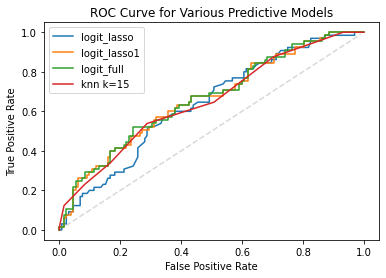

In [746]:
from sklearn import metrics

model_KNN_classifier = KNeighborsClassifier(n_neighbors=15).fit(harvard_train[features_12], harvard_train['admitted'])

yhat_logit_lasso1= logit_lasso1.predict_proba(harvard_test[features_12])[:,1]
yhat_logit_lasso= logit_lasso.predict_proba(harvard_test[features_mix])[:,1]
yhat_logit_full= logit_full.predict_proba(harvard_test[features_12])[:,1]
yhat_knn= model_KNN_classifier.predict_proba(harvard_test[features_12])[:,1]

#yhat_logit_ridge= logit_ridge.predict_proba(X_test)[:,1]


fpr, tpr, thresholds = metrics.roc_curve(harvard_test['admitted'], yhat_logit_lasso)
fpr_lasso1, tpr_lasso1, thresholds_lasso1 = metrics.roc_curve(harvard_test['admitted'], yhat_logit_lasso1)
fpr_full, tpr_full, thresholds_full = metrics.roc_curve(harvard_test['admitted'], yhat_logit_full)
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(harvard_test['admitted'], yhat_knn)

#fpr_ridge, tpr_ridge, thresholds_ridge = metrics.roc_curve(y_test, yhat_logit_ridge)

x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.plot(fpr,tpr,label="logit_lasso")
plt.plot(fpr_lasso1,tpr_lasso1,label="logit_lasso1")
plt.plot(fpr_full,tpr_full,label="logit_full")
plt.plot(fpr_knn,tpr_knn,label="knn k=15")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Various Predictive Models")
plt.legend()
plt.show()

**INTERPRETATION:**

This chart is pretty challenging to interpret. Its hard to tell which version is best. It is pretty clear that the 4 models are quite similar. Logit lasso looks worse than it performs. I would say this doesn't support my answer from 5.1 since these charts such challengingly indifferentiatable data 

<div class='exercise-r'>  
 
**5.3** Calculate and report AUC for all 4 models.  Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?
 
 </div>

In [747]:
# your code here
print(metrics.auc(fpr,tpr))
print(metrics.auc(fpr_lasso1, tpr_lasso1))
print(metrics.auc(fpr_full, tpr_full))
print(metrics.auc(fpr_knn, tpr_knn))

0.6365384615384615
0.6617715617715618
0.664918414918415
0.6514568764568766


**INTERPRETATION:**

this represents close to what I interpretted from the graph, the area under the graph for the lasso without the interactions had the smallest area underneath. The rest are about what I expected, the area under the graph for the KNN is smaller than I expected. They are close to matching the classification accuracy mix, but just slightly different. I guess this difference can be attributed to the difference in accuracy measurement implimented. I'm not super certain which would be better 

<div class='exercise-r'>  
    
**5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?
</div>

**INTERPRETATION:**

I would likely use the knn model. The accuracy was the highest, and aesthetically the smoothness of the graph just looks nice! Terrible reason I know, but aesthetics are meaningful in the marketing world. I'm sure that some of these other ones would work well like lasso full as well. 

I think the biggest issue would be the argument around affirmative action and the likes that often come up in our society. I'm sure seeign the direct statistics would cause wide spread complaint. From an applicant standpoint, it may also give some people the false idea that they have no chance or others may think there chances are great and put less effort into their appplication. 